# Vectors
Vectors, and vector spaces, are fundamental to *linear algebra*, and they're used in many machine learning models. Vectors describe spatial lines and planes, enabling you to perform calculations that explore relationships in multi-dimensional space.

## What is a Vector
At its simplest, a vector is a numeric element that has both *magnitude* and *direction*. The magnitude represents a distance (for example, "2 miles") and the direction indicates which way the vector is headed (for example, "East"). Vectors are defined by an n-dimensional coordinate that describe a point in space that can be connected by a line from an arbitrary origin.

That all seems a bit complicated, so let's start with a simple, two-dimensional example. In this case, we'll have a vector that is defined by a point in a two-dimensional plane: A two dimensional coordinate consists of an *x* and a *y* value, and in this case we'll use **2** for *x* and **1** for *y*.

Our vector can be written as **v**=(2,1), but more formally we would use the following notation, in which the dimensional coordinate values for the vector are shown as a matrix:
\begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation}

So what exactly does that mean? Well, the coordinate is two-dimensional, and describes the movements required to get to the end point (of *head*) of the vector - in this case, we need to move 2 units in the *x* dimension, and 1 unit in the *y* dimension. Note that we don't specify a starting point for the vector - we're simply describing a destination coordinate that encapsulate the magnitide and direction of the vector. Think about it as the directions you need to follow to get to *there* from *here*, without specifying where *here* actually is!

It can help to visualize the vector, and with a two-dimensional vector, that's pretty straightforward. We just define a two-dimensional plane, choose a starting point, and plot the coordinate described by the vector relative to the starting point.

Run the code in the following cell to visualize the vector **v** (which remember is described by the coordinate (2,1)).

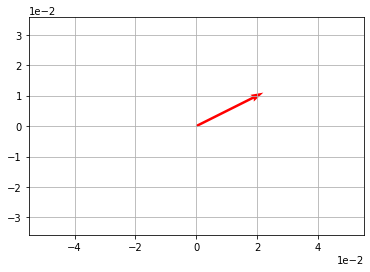

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# We'll use a numpy array for our vector
v = np.array([2,1])

# and we'll use a quiver plot to visualize it.
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, *v, scale=10, color='r')
plt.show()

Note that we can use a numpy array to define the vector in Python; so to create our (2,1) vector, we simply create a numpy array with the elements [2,1]. We've then used a quiver plot to visualize the vector, using the point 0,0 as the starting point (or *origin*). Our vector of (2,1) is shown as an arrow that starts at 0,0 and moves 2 units along the *x* axis (to the right) and 1 unit along the *y* axis (up).

## Calculating Vector Magnitude and Direction
We tend to work with vectors by expressing their components as *cartesian coordinates*; that is, *x* and *y* (and other dimension) values that define the number of units travelled along each dimension. So the coordinates of our (2,1) vector indicate that we must travel 2 units along the *x* axis, and *1* unit along the *y* axis.

However, you can also work with verctors in terms of their *polar coordinates*; that is coordinates that describe the magnitude and direction of the vector. The magnitude is the overall distance of the vector from tail to head, and the direction is the angle at which the vector is oriented.

### Calculating Magnitude
Calculating the magnitude of the vector from its cartesian coordinates requires measuring the distance between the arbitrary starting point and the vector head point. For a two-dimensional vector, we're actually just calculating the length of the hypotenuse in a right-angled triangle - so we could simply invoke Pythagorean theorum and calculate the square root of the sum of the squares of it's components, like this:

\begin{equation}\|\vec{v}\| = \sqrt{v_{1}\;^{2} + v_{2}\;^{2}}\end{equation}

The notation for a vector's magnitude is to surround the vector name with vertical bars - you can use single bars (for example, |**v**|) or double bars (||**v**||). Double-bars are often used to avoid confusion with absolute values. Note that the components of the vector are indicated by subscript indices (v<sub>1</sub>, v<sub>2</sub>,...v<sub>*n*</sub>),

In this case, the vector **v** has two components with values **2** and **1**, so our magnitude calculation is:

\begin{equation}\|\vec{v}\| = \sqrt{2^{2} + 1^{2}}\end{equation}

Which is:

\begin{equation}\|\vec{v}\| = \sqrt{4 + 1}\end{equation}

So:

\begin{equation}\|\vec{v}\| = \sqrt{5} \approx 2.24\end{equation}

You can run the following Python code to get a more precise result (note that the elements of a numpy array are zero-based)

In [2]:
import math

vMag = math.sqrt(v[0]**2 + v[1]**2)
print (vMag)

2.23606797749979


This calculation works for vectors of any dimensionality - you just take the square root of the sum of the squared components:

\begin{equation}\|\vec{v}\| = \sqrt{v_{1}\;^{2} + v_{2}\;^{2} ... + v_{n}\;^{2}}\end{equation}

In Python, *numpy* provides a linear algebra library named **linalg** that makes it easier to work with vectors - you can use the **norm** function in the following code to calculate the magnitude of a vector:

In [3]:
import numpy as np

vMag = np.linalg.norm(v)
print (vMag)

2.23606797749979


### Calculating Direction
To calculate the direction, or *amplitude*, of a vector from its cartesian coordinates, you must employ a little trigonometry. We can get the angle of the vector by calculating the *inverse tangent*; sometimes known as the *arctan* (the *tangent*  calculates an angle as a ratio - the inverse tangent, or **tan<sup>-1</sup>**, expresses this in degrees).

In any right-angled triangle, the tangent is calculated as the *opposite* over the *adjacent*. In a two dimensional vector, this is the *y* value over the *x* value, so for our **v** vector (2,1):

\begin{equation}tan(\theta) = \frac{1}{2}\end{equation}

This produces the result ***0.5***, from which we can use a calculator to calculate the inverse tangent to get the angle in degrees:

\begin{equation}\theta = tan^{-1} (0.5) \approx 26.57^{o}\end{equation}

Note that the direction angle is indicated as ***&theta;***.

Run the following Python code to confirm this:

In [4]:
import math
import numpy as np

v = np.array([2,1])
vTan = v[1] / v[0]
print ('tan = ' + str(vTan))
vAtan = math.atan(vTan)
# atan returns the angle in radians, so convert to degrees
print('inverse-tan = ' + str(math.degrees(vAtan)))

tan = 0.5
inverse-tan = 26.56505117707799


There is an added complication however, because if the value for *x* or *y* (or both) is negative, the orientation of the vector is not standard, and a calculator can give you the wrong tan<sup>-1</sup> value. To ensure you get the correct direction for your vector, use the following rules:
- Both *x* and *y* are positive: Use the tan<sup>-1</sup> value.
- *x* is negative, *y* is positive: Add 180 to the tan<sup>-1</sup> value.
- Both *x* and *y* are negative: Add 180 to the tan<sup>-1</sup> value.
- *x* is positive, *y* is negative: Add 360 to the tan<sup>-1</sup> value.

To understand why we need to do this, think of it this way. A vector can be pointing in any direction through a 360 degree arc.  Let's break that circle into four quadrants with the x and y axis through the center. Angles can be measured from the x axis in both the positive (counter-clockwise) and negative (clockwise) directions. We'll number the quadrants in the positive (counter-clockwise) direction (which is how we measure the *positive* angle) like this:

    

    2 | 1
    - o -
    3 | 4


OK, let's look at 4 example vectors

 1. Vector [2,4] has positive values for both x and y. The line for this vector travels through the point 0,0 from quadrant 3 to quadrant 1. Tan<sup>-1</sup> of 4/2 is around 63.4 degrees, which is the positive angle from the x axis to the vector line - so this is the direction of the vector.
 2. Vector [-2,4] has a negative x and positive y. The line for this vector travels through point 0,0 from quadrant 4 to quadrant 2. Tan<sup>-1</sup> of 4/-2 is around -64.4 degrees, which is the *negative* angle from x to the vector line; but in the wrong direction (as if the vector was travelling from quadrant 2 towards quadrant 4). So we need the opposite direction, which we get by adding 180.
 3. Vector [-2,-4] has negative x and y. The line for the vector travels through 0,0 from quadrant 1 to quadrant 3. Tan<sup>-1</sup> of -4/-2 is around 63.4 degrees, which is the angle between the x axis and the line, but again in the opposite direction, from quadrant 3 to quadrant 1; we need to go a further 180 degrees to reflect the correct direction.
 4. Vector [2,-4] has positive x and negative y. It travels through 0,0 from quadrant 2 to quadrant 4. Tan<sup>-1</sup> of -4/2 is around -64.4 degrees, which is the *negative* angle from the x axis to the vector line. Technically it's correct, the line is travelleing down and to the right at an angle of -63.4 degrees; but we want to express the *positive* (counter-clockwise) angle, so we add 360.


In the previous Python code, we used the *math.**atan*** function to calculate the inverse tangent from a numeric tangent. The *numpy* library includes a similar ***arctan*** function. When working with numpy arrays, you can also use the *numpy.**arctan2*** function to return the inverse tangent of an array-based vector in *radians*, and you can use the *numpy.**degrees*** function to convert this to degrees. The ***arctan2*** function automatically makes the necessary adjustment for negative *x* and *y* values.

In [5]:
import numpy as np

v = np.array([2,1])
print ('v: ' + str(np.degrees(np.arctan2(v[1], v[0]))))

s = np.array([-3,2])
print ('s: ' + str(np.degrees(np.arctan2(s[1], s[0]))))

v: 26.56505117707799
s: 146.30993247402023


## Vector Addition
So far, we've worked with one vector at a time. What happens when you need to add two vectors.

Let's take a look at an example, we already have a vector named **v**, as defined here:
\begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation}
Now let's create a second vector, and called **s** like this:
\begin{equation}\vec{s} = \begin{bmatrix}-3 \\ 2 \end{bmatrix}\end{equation}

Run the cell below to create **s** and plot it together with **v**:

[-3  2]


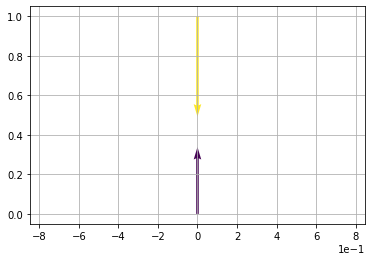

In [11]:
import math
import numpy as np

%matplotlib inline

v = np.array([2,1])
s = np.array([-3,2])
print (s)

# Plot v and s
vecs = np.array([v,s])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver([*origin], vecs[:,0], vecs[:,1], color=['r', 'b'], scale=10)
plt.show()

You can see in the plot that the two vectors have different directions and magnitudes. So what happens when we add them together?

Here's the formula:
\begin{equation}\vec{z} = \vec{v}+\vec{s}\end{equation}

In terms of our vector matrices, this looks like this:
\begin{equation}\vec{z} = \begin{bmatrix}2 \\ 1 \end{bmatrix} + \begin{bmatrix}-3 \\ 2 \end{bmatrix}\end{equation}

Which gives the following result:
\begin{equation}\vec{z} = \begin{bmatrix}2 \\ 1 \end{bmatrix} + \begin{bmatrix}-3 \\ 2 \end{bmatrix} = \begin{bmatrix}-1 \\ 3 \end{bmatrix}\end{equation}

Let's verify that Python gives the same result:

In [13]:
z = v + s
print(z)

[-1  3]


So what does that look like on our plot?

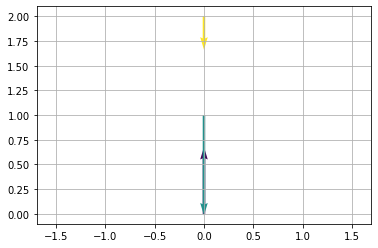

In [17]:
vecs = np.array([v,s,z])
origin = [0], [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver([*origin], vecs[:,0], vecs[:,1], color=['r', 'b', 'g'], scale=10)
plt.show()

So what's going on here?
Well, we added the dimensions of **s** to the dimensions of **v** to describe a new vector **z**. Let's break that down:
- The dimensions of **v** are (2,1), so from our starting point we move 2 units in the *x* dimension (across to the right) and 1 unit in the *y* dimension (up). In the plot, if you start at the (0,0) position, this is shown as the red arrow.
- Then we're adding **s**, which has dimension values (-3, 2), so we move -3 units in the *x* dimension (across to the left, because it's a negative number) and then 2 units in the *y* dimension (up). On the plot, if you start at the head of the red arrow and make these moves, you'll end up at the head of the green arrow, which represents **z**.

The same is true if you perform the addition operation the other way around and add **v** to **s**, the steps to create **s** are described by the blue arrow, and if you use that as the starting point for **v**, you'll end up at the head of the green arrow, which represents **z**.

Note on the plot that if you simply moved the tail of the blue arrow so that it started at the head of red arrow, its head would end up in the same place as the head of the green arrow; and the same would be true if you moved tail of the red arrow to the head of the blue arrow.